# Instructions for what to do _before_ running this notebook

* Run file `PSAllModels.py` (located in `C:\Users\maria\MEGAsync\SLCN\models\`). Make sure to set all variables to the right values.
* This will save results similar to `Bbspr_2020_8_3_17_1_humans_n_samples20_map.pickle` (located, e.g., in `C:\Users\maria\MEGAsync\SLCN\PShumanData\fitting\mice`)
* Then run file `MAPResultPlots.py` (located in `C:\Users\maria\MEGAsync\SLCN\models\`). Again, make sure to set all variables to the right values.
* This will create several files in the folder of the original results, e.g., `params_Bbspr_session_388_pymc3.csv` and `nll_bics.csv`
* It will also save files `modelwise_LLs.csv`, `subjwise_LLs.csv`, etc. in the `plots` subfolder in this directory
* Once you have these files, run this notebook here

# Imports

In [1]:
import plotnine as gg
gg.theme_set(gg.theme_classic)
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt

from Functions import load_mouse_data, get_info_from_fullID, add_meta_column

# Directories

In [2]:
base_dir = 'C:/Users/maria/MEGAsync/SLCN'
param_dir = os.path.join(base_dir, 'PShumanData/fitting/mice/')
plot_save_dir = os.path.join(base_dir, 'models/plots/')

In [3]:
winning_model_names = ['Bbspr', 'RLabnp2']
winning_model_names = ['RLab', 'RLabj']

# Plot model fits

In [4]:
model_fits = pd.read_csv(os.path.join(param_dir, 'plots', 'modelwise_LLS.csv'))
model_fits = model_fits.sort_values(by=['WAIC']).reset_index(drop=True)
model_fits

,model_name,slope_variable,n_subj,WAIC,NLL,AIC
0,Bbspr,session,383,109909.531250,53422.765625,109909.531250
1,RLabnp2,session,383,112558.921875,54364.460938,112558.921875
2,RLabd,session,383,124766.906250,61234.453125,124766.906250
3,RLabhj,session,383,125842.250000,61389.125000,125842.250000
4,RLabj,session,383,125981.218750,61841.609375,125981.218750
5,RLabh,session,383,127317.382812,62509.691406,127317.382812
6,RLab,session,383,127448.343750,62958.171875,127448.343750
7,RLabi,session,383,127631.203125,62666.601562,127631.203125
8,B,session,383,132521.000000,66260.500000,132521.000000


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/9_WAICs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


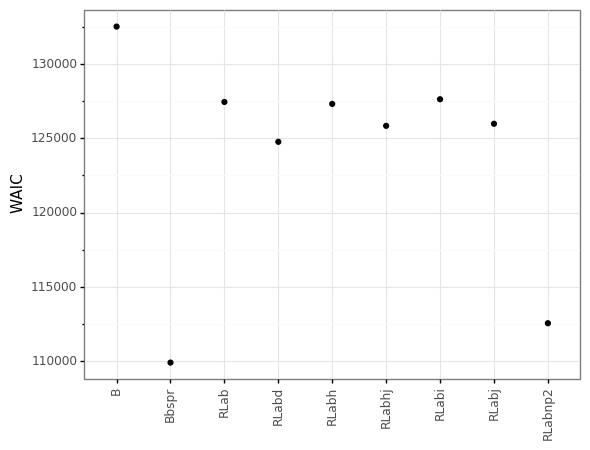

<ggplot: (145719248725)>

In [5]:
g = (gg.ggplot(model_fits, gg.aes('model_name', 'WAIC'))
     + gg.geom_point()
     + gg.theme_bw()
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
     + gg.labs(x='')
)
g.save(os.path.join(plot_save_dir, '9_WAICs.png'))
g

In [6]:
fits = pd.read_csv(os.path.join(param_dir, 'plots', 'subjwise_LLs.csv'))
fits = fits.drop(columns=['slope_variable', 'n_subj'])
fits

,model_name,n_params,1404012,1404112,1404212,1404312,1404412,1404512,1404612,1404712,...,1208621,1307221,1307421,1307621,1307721,1307921,1308021,1308121,1308221,1308321
0,Bbspr,4,-120.936493,-158.549515,-180.643509,-114.966438,-98.239319,-110.326279,-130.702209,-94.997353,...,-93.639267,-143.633820,-155.563736,-105.001709,-121.865852,-115.502686,-164.467407,-128.151291,-123.640404,-153.418533
1,B,0,-170.808441,-234.995346,-221.889969,-156.833481,-115.123734,-129.000000,-148.497055,-123.421310,...,-138.148697,-188.503296,-208.515839,-147.899841,-210.687531,-153.266647,-187.347702,-154.969345,-145.682617,-156.304901
2,RLabd,3,-156.908096,-226.826813,-191.706635,-126.293945,-104.896309,-133.915741,-164.112198,-109.105583,...,-99.079720,-151.156052,-186.440948,-116.001617,-149.575012,-128.234573,-180.019745,-153.537994,-131.025635,-192.442200
3,RLabhj,4,-154.587173,-222.931458,-194.454086,-123.494263,-99.258224,-136.263870,-159.207092,-113.882332,...,-100.683380,-151.961075,-188.912842,-113.650314,-147.285095,-137.557419,-178.602722,-165.513321,-141.755341,-203.139694
4,RLabh,3,-158.238876,-229.284348,-195.683868,-126.330788,-105.278961,-137.030396,-163.087219,-114.071198,...,-101.355965,-152.371368,-191.892044,-116.668724,-148.931137,-142.117966,-184.050797,-169.396866,-143.942291,-212.942398
5,RLabi,3,-155.036667,-230.188034,-200.560898,-124.674561,-104.287285,-138.356491,-162.872284,-113.996857,...,-101.244072,-152.399307,-191.898239,-113.875221,-149.713867,-139.991699,-183.688568,-171.577927,-143.690033,-212.984528
6,RLabj,3,-155.086685,-223.923874,-199.624542,-124.411102,-99.697395,-137.810852,-160.641525,-113.996185,...,-101.374504,-152.265900,-189.219009,-114.420784,-148.513947,-137.715942,-178.667648,-168.171585,-142.038010,-203.204559
7,RLabnp2,5,-119.732018,-158.771225,-183.443405,-115.385872,-93.376083,-111.595673,-129.990067,-93.760551,...,-92.908463,-147.839996,-158.763092,-108.810448,-125.987427,-118.115730,-166.097763,-128.304947,-127.509300,-154.404709
8,RLab,2,-159.572495,-230.239639,-201.174332,-126.807243,-105.371864,-138.481430,-164.864548,-114.193085,...,-102.144913,-152.827194,-192.279343,-118.664742,-149.809601,-142.459244,-184.280548,-172.013794,-144.056396,-212.990433


In [7]:
# Melt
fits_ = pd.melt(fits, id_vars=['model_name', 'n_params'], var_name='fullID', value_name='LL')

# Add BIC and AIC
n_trials = 725
for row in range(len(fits_)):
    fits_.loc[row, 'AIC'] = 2 * fits_.loc[row, 'n_params'] - 2 * fits_.loc[row, 'LL']
    fits_.loc[row, 'BIC'] = np.log(n_trials) * fits_.loc[row, 'n_params'] - 2 * fits_.loc[row, 'LL']

# Add animal id, age, gender
animal_colnames = ['fullID', 'agegroup', 'sex', 'age', 'animal']
for col in animal_colnames[1:]:
    fits_[col] = fits_.fullID.apply(get_info_from_fullID, column_name=col)
fits_

,model_name,n_params,fullID,LL,AIC,BIC,agegroup,sex,age,animal
0,Bbspr,4,1404012,-120.936493,249.872986,268.217672,Juvenile,Male,40,14
1,B,0,1404012,-170.808441,341.616882,341.616882,Juvenile,Male,40,14
2,RLabd,3,1404012,-156.908096,319.816193,333.574708,Juvenile,Male,40,14
3,RLabhj,4,1404012,-154.587173,317.174347,335.519034,Juvenile,Male,40,14
4,RLabh,3,1404012,-158.238876,322.477753,336.236268,Juvenile,Male,40,14
...,...,...,...,...,...,...,...,...,...,...
3442,RLabh,3,1308321,-212.942398,431.884796,445.643311,Adult,Female,83,13
3443,RLabi,3,1308321,-212.984528,431.969055,445.727570,Adult,Female,83,13
3444,RLabj,3,1308321,-203.204559,412.409119,426.167634,Adult,Female,83,13
3445,RLabnp2,5,1308321,-154.404709,318.809418,341.740276,Adult,Female,83,13


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/9_LLs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/9_BICs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\

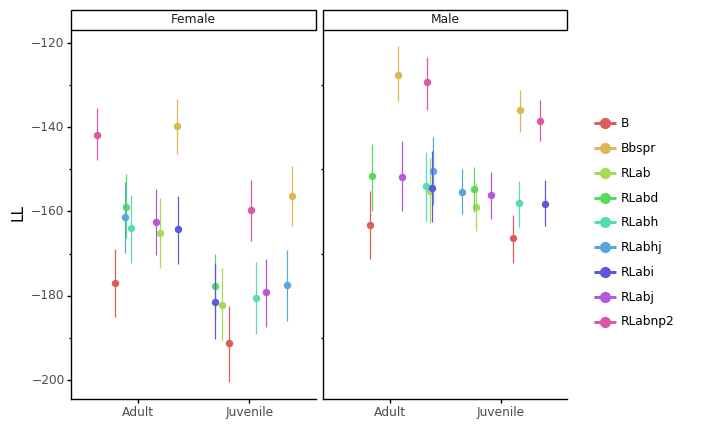

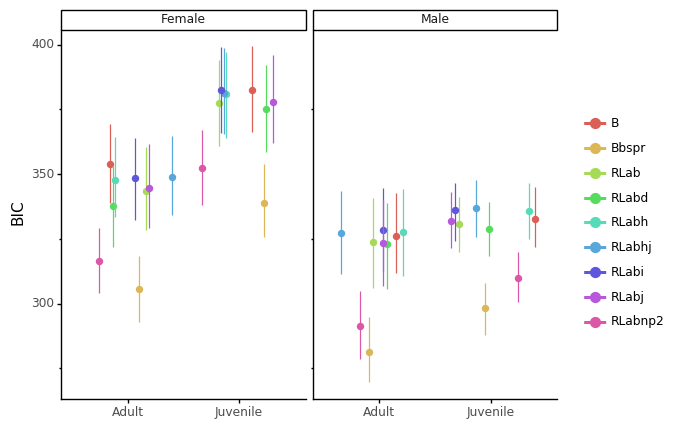

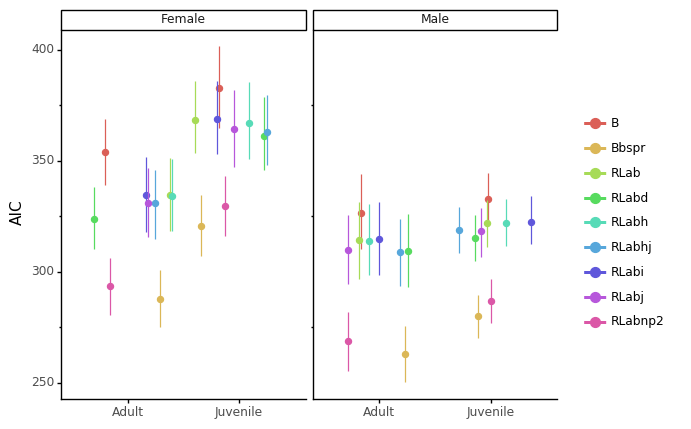

In [8]:
for yax in ['LL', 'BIC', 'AIC']:
    g = (gg.ggplot(fits_, gg.aes('factor(agegroup)', yax, color='model_name'))
     + gg.stat_summary(position='jitter')
     + gg.facet_wrap('~ sex')
     + gg.labs(x='', color='')
    )
    g.draw()
    g.save(os.path.join(plot_save_dir, '9_{}s.png'.format(yax)))

In [9]:
# Get AICs
AICs = fits_.pivot_table(columns='model_name', index=animal_colnames, values='AIC')

for col in AICs.columns:
    if 'RL' in col:
        ref_col = winning_model_names[1]
    elif 'B' in col:
        ref_col = winning_model_names[0]
    elif 'WSLS' in col:
        ref_col = winning_model_names[0]
    AICs['{}_minus_{}'.format(col, ref_col)] = AICs[col] - AICs[ref_col]
ref_col, col = winning_model_names
AICs['{}_minus_{}'.format(col, ref_col)] = AICs[col] - AICs[ref_col]

# AIC differences
AICs_rel = AICs.drop(columns=[col for col in AICs.columns if
                              (not 'minus' in col) and (not col=='sex') and (not col=='agegroup')])
AICs_rel = AICs_rel.reset_index()
AICs_rel = AICs_rel.melt(id_vars=animal_colnames, value_name='AIC')
AICs_rel

,fullID,agegroup,sex,age,animal,model_name,AIC
0,1007521,Adult,Female,75,10,B_minus_RLab,63.795471
1,1007621,Adult,Female,76,10,B_minus_RLab,69.206848
2,1007721,Adult,Female,77,10,B_minus_RLab,20.697449
3,1007821,Adult,Female,78,10,B_minus_RLab,5.798767
4,1007921,Adult,Female,79,10,B_minus_RLab,22.774155
...,...,...,...,...,...,...,...
3825,907921,Adult,Female,79,9,RLabj_minus_RLab,-3.293732
3826,908121,Adult,Female,81,9,RLabj_minus_RLab,1.359161
3827,908221,Adult,Female,82,9,RLabj_minus_RLab,1.070496
3828,908321,Adult,Female,83,9,RLabj_minus_RLab,0.028381


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/9_RelativeAICs2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


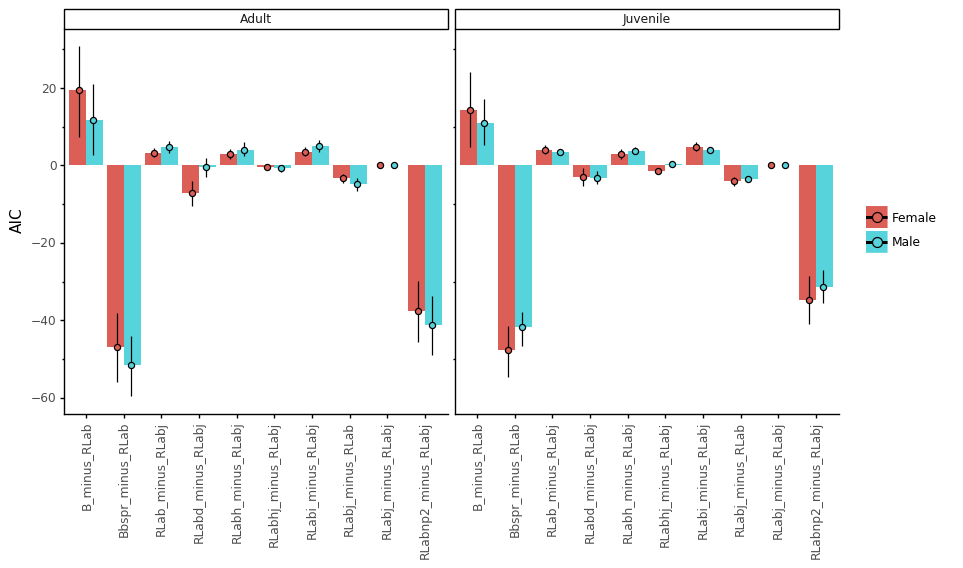

In [10]:
# Plot AIC differences
gg.options.figure_size = (10, 5)
g = (gg.ggplot(AICs_rel, gg.aes('model_name', 'AIC', fill='sex'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(position=gg.position_dodge(width=0.75))
#  + gg.geom_point()
 + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
 + gg.labs(x='', fill='')
 + gg.facet_grid('~ agegroup')
)
g.draw()
g.save(os.path.join(plot_save_dir, '9_RelativeAICs2.png'))

# Load fitted parameters

In [11]:
# Load
all_params = pd.DataFrame()
for file in os.listdir(param_dir):
    if ('csv' in file) and ('nll' not in file):
        
        new_params = pd.read_csv(os.path.join(param_dir, file))
        new_params['agegroup'] = new_params.sID.apply(get_info_from_fullID, column_name='agegroup')
        all_params = all_params.append(new_params)

# Preprocess        
all_params['agegroup'] = pd.Categorical(all_params['agegroup'], ordered=True, categories=('Juvenile', 'Adult'))
# all_params = all_params.rename(columns={'Gender': 'sex', 'PreciseYrs': 'age'})
all_params['meta'] = add_meta_column(all_params)
all_params = all_params.drop(columns=
                             ['PDS', 'T1', 'cnalpha_rew', 'slope_variable', 'fullID', 'age_z'])  #, 'p_noisy'
all_params = all_params.loc[all_params.meta != 'nan']
# all_params.beta /= 15
all_params

,age,agegroup,alpha,animal,beta,bias,calpha,cnalpha,cnrta,crta,...,p_noisy,p_reward,p_switch,persev,rta,rtb,sID,session,sex,meta
0,40,Juvenile,NaN,14,3.573277,0.0,NaN,NaN,NaN,NaN,...,0.00001,0.862980,0.185938,0.321775,NaN,NaN,1404012,0.0,Male,1-3
1,41,Juvenile,NaN,14,2.755208,0.0,NaN,NaN,NaN,NaN,...,0.00001,0.897763,0.174708,0.353098,NaN,NaN,1404112,1.0,Male,1-3
2,42,Juvenile,NaN,14,1.698398,0.0,NaN,NaN,NaN,NaN,...,0.00001,0.999842,0.000456,0.459071,NaN,NaN,1404212,2.0,Male,1-3
3,43,Juvenile,NaN,14,14.892703,0.0,NaN,NaN,NaN,NaN,...,0.00001,0.724270,0.330944,0.092737,NaN,NaN,1404312,3.0,Male,4-8
4,44,Juvenile,NaN,14,14.992540,0.0,NaN,NaN,NaN,NaN,...,0.00001,0.332223,0.304446,0.022457,NaN,NaN,1404412,4.0,Male,4-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,79,Adult,0.658873,13,4.936704,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.000000,0.0,0.0,1307921,4.0,Female,4-8
379,80,Adult,0.781801,13,3.405244,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.000000,0.0,0.0,1308021,5.0,Female,4-8
380,81,Adult,0.680646,13,3.982055,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.000000,0.0,0.0,1308121,6.0,Female,4-8
381,82,Adult,0.774422,13,4.945253,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.000000,0.0,0.0,1308221,7.0,Female,4-8


In [12]:
animal_colnames = ['sID', 'session', 'agegroup', 'sex', 'age', 'animal', 'meta']
all_params_long = pd.melt(all_params, id_vars=animal_colnames + ['model'],
                          var_name='param_name', value_name='param_value')
all_params_long = all_params_long[all_params_long.param_value != 0]
# all_params_long = add_meta_column(all_params_long)
all_params_long

,sID,session,agegroup,sex,age,animal,meta,model,param_name,param_value
0,1404012,0.0,Juvenile,Male,40,14,1-3,Bbspr,alpha,NaN
1,1404112,1.0,Juvenile,Male,41,14,1-3,Bbspr,alpha,NaN
2,1404212,2.0,Juvenile,Male,42,14,1-3,Bbspr,alpha,NaN
3,1404312,3.0,Juvenile,Male,43,14,4-8,Bbspr,alpha,NaN
4,1404412,4.0,Juvenile,Male,44,14,4-8,Bbspr,alpha,NaN
...,...,...,...,...,...,...,...,...,...,...
50168,1307921,4.0,Adult,Female,79,13,4-8,RLabh,rtb,-0.416241
50169,1308021,5.0,Adult,Female,80,13,4-8,RLabh,rtb,-0.346034
50170,1308121,6.0,Adult,Female,81,13,4-8,RLabh,rtb,-1.035230
50171,1308221,7.0,Adult,Female,82,13,4-8,RLabh,rtb,-0.242007


# Plotting functions

In [13]:
def subset_model_data(data, model_name):
    
    win_mod_sub = data.model == model_name
    not_nan_sub = np.invert(np.isnan(data.loc[win_mod_sub, 'param_value']))
    sub_dat = data[np.logical_and(win_mod_sub, not_nan_sub)]

    return sub_dat

# # Example use
# plotted_model_name = winning_model_names[0]
# sub_dat = subset_model_data(all_params_long, plotted_model_name)

In [14]:
def plot_session_params(data, winning_model_name):

    gg.options.figure_size = (8, 5)
    
    # Plot
    g = (gg.ggplot(sub_dat, gg.aes('session', 'param_value', color='agegroup'))
     + gg.geom_point(alpha=0.5)
     + gg.geom_smooth()
#      + gg.coord_cartesian(xlim=(0, 12))
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
     + gg.labs(y='')
     + gg.facet_wrap('~ sex + param_name', scales='free_y', ncol=len(np.unique(sub_dat.param_name)))
    )

    save_dir = os.path.join(plot_save_dir, '10_ParamsSession_{}.png'.format(winning_model_name))
    print("Saving to {}".format(save_dir))
    g.save(save_dir)
    gg.options.figure_size = (5, 5)

    
    return g
    
# # Example use
# plot_session_params(sub_dat, plotted_model_name)

In [15]:
def plot_meta_params(data, winning_model_name):

    # Males only
    sub_dat_male = data[data.sex == 'Male']
    g_male = (gg.ggplot(sub_dat_male, gg.aes('meta', 'param_value', fill='agegroup'))
     + gg.stat_summary(geom='bar', position=gg.position_dodge(width=0.9))
     + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.9))
#      + gg.coord_cartesian(ylim=(0, 1))  # adapt for BF (0, 0.8) vs RL (0, 1)
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5),
                legend_position='none')
     + gg.labs(x='', y='')
     + gg.facet_wrap('~ agegroup + param_name', scales='free_y', ncol=len(np.unique(sub_dat.param_name)))
#      + gg.facet_grid('agegroup ~ param_name')
    )
    g_male.save(os.path.join(plot_save_dir, '11_ParamsMetaMale_{}.png'.format(winning_model_name)))
    
    # Females only
    g_female = g_male
    g_female.data = data[data.sex == 'Female']
    g_female.save(os.path.join(plot_save_dir, '11_ParamsMetaFemale_{}.png'.format(winning_model_name)))
    
    return g_female
    
# # Example use
# plot_meta_params(sub_dat, plotted_model_name)

In [16]:
def plot_agegroup_params(data, winning_model_name):

    ## Males only
    sub_dat_male = data[data.sex == 'Male']
    g_m = (gg.ggplot(sub_dat_male, gg.aes('agegroup', 'param_value', fill='agegroup'))
     + gg.stat_summary(geom='bar', position=gg.position_dodge)
     + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5),
                legend_position='none')
#      + gg.coord_cartesian(ylim=(-0.1, 1))
     + gg.labs(x='', y='')
     + gg.facet_wrap('~ meta + param_name', scales='free_y', ncol=len(np.unique(sub_dat.param_name)))
#      + gg.facet_grid('meta ~ param_name')
    )
    g_m.save(os.path.join(plot_save_dir, '12_ParamsAgegroupMale_{}.png'.format(winning_model_name)))
    
    ## Females only
    g_f = g_m
    g_f.data = data[data.sex == 'Female']
    g_f.save(os.path.join(plot_save_dir, '12_ParamsAgegroupFemale_{}.png'.format(winning_model_name)))
    
    return g_f
    
# # Example use
# plot_agegroup_params(sub_dat, plotted_model_name)

In [17]:
def plot_age_params(data, winning_model_name, file_name_sub=''):

    g = (gg.ggplot(data, gg.aes('age', 'param_value', color='sex'))
     + gg.geom_point()
     + gg.geom_smooth(color='black')
#      + gg.facet_grid('sex ~ param_name')
     + gg.facet_wrap('~ sex + param_name', scales='free_y', ncol=len(np.unique(sub_dat.param_name)))
     + gg.labs(x='Age', y='')
    )
    g.save(os.path.join(plot_save_dir, '13_ParamsAge_{}{}.png'.format(winning_model_name, file_name_sub)))
    
    return g
    
# # Example use
# plot_age_params(sub_dat, plotted_model_name)

## Plot winning models

In [18]:
def update_q(old_q, alpha, rpe, rt, rta):
    
    rta_ = rta * (rt - 1) + 1
    return old_q + (rta_ * alpha * rpe)

# Example
update_q(old_q=0.5, alpha=0.5, rpe=0.2, rt=0.2, rta=-0.2)

0.616

In [19]:
# Create data for vizualization
rpe = 0.2

rta_dat = pd.DataFrame()

for alpha in [0.1, 0.5, 0.9]:
    for old_q in [0.4, 0.5, 0.6]:
        for rt in [0, 0.3, 0.6, 0.9]:
            for rta in [-0.4, -0.2, 0, 0.2, 0.4]:

                new_q = update_q(old_q=old_q, alpha=alpha, rpe=rpe, rt=rt, rta=rta)
                new_row = pd.DataFrame(
                    {'old_q': [old_q], 'alpha': [alpha], 'rpe': [rpe], 'rt': [rt], 'rta': [rta], 'new_q': [new_q]})

                rta_dat = pd.concat([rta_dat, new_row])
        
rta_dat

,old_q,alpha,rpe,rt,rta,new_q
0,0.4,0.1,0.2,0.0,-0.4,0.4280
0,0.4,0.1,0.2,0.0,-0.2,0.4240
0,0.4,0.1,0.2,0.0,0.0,0.4200
0,0.4,0.1,0.2,0.0,0.2,0.4160
0,0.4,0.1,0.2,0.0,0.4,0.4120
...,...,...,...,...,...,...
0,0.6,0.9,0.2,0.9,-0.4,0.7872
0,0.6,0.9,0.2,0.9,-0.2,0.7836
0,0.6,0.9,0.2,0.9,0.0,0.7800
0,0.6,0.9,0.2,0.9,0.2,0.7764


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/20_Understand_rta.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


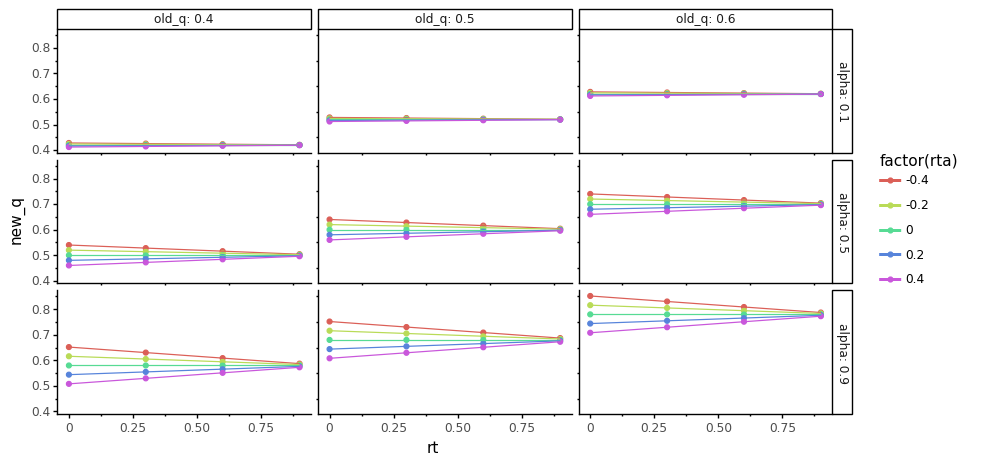

<ggplot: (145719822172)>

In [20]:
# Bottom line:
    # positive rta: longer rts => larger updates
    # negative rta: longer rts => smaler updates
    # rta == 0: no effect of rts on updates
    # larger alpha: larger effect of rts
    # larger old_q: no difference
gg.options.figsize = (5, 5)
g = (gg.ggplot(rta_dat, gg.aes('rt', 'new_q', color='factor(rta)'))
     + gg.geom_point()
     + gg.geom_line()
     + gg.facet_grid('alpha ~ old_q', labeller='label_both')
)
g.save(os.path.join(plot_save_dir, '20_Understand_rta.png'))
g

In [21]:
def p_from_qs(q_diff, beta, bias, rtb, rt):
    
    rtb_ = rtb * (rt - 1) + 1
    return 1 / (1 + np.exp(rtb_ * beta * (q_diff + bias)))

# Example use
p_from_qs(q_diff=0.3, beta=2, bias=0, rtb=0.2, rt=0.5)

0.3681875822638983

In [22]:
# Create data for vizualization
rtb_dat = pd.DataFrame()

bias = 0
for q_diff in [-0.3, 0, 0.3]:
    for beta in [0.1, 1, 3]:
        for rt in [0, 0.3, 0.6, 0.9]:
            for rtb in [-0.4, -0.2, 0, 0.2, 0.4]:

                p = p_from_qs(q_diff=q_diff, beta=beta, bias=bias, rtb=rtb, rt=rt)
                new_row = pd.DataFrame(
                    {'q_diff': [q_diff], 'beta': [beta], 'bias': [bias], 'rt': [rt], 'rtb': [rtb], 'p': [p]})

                rtb_dat = pd.concat([rtb_dat, new_row])
        
rtb_dat

,q_diff,beta,bias,rt,rtb,p
0,-0.3,0.1,0,0.0,-0.4,0.510498
0,-0.3,0.1,0,0.0,-0.2,0.508999
0,-0.3,0.1,0,0.0,0.0,0.507499
0,-0.3,0.1,0,0.0,0.2,0.506000
0,-0.3,0.1,0,0.0,0.4,0.504500
...,...,...,...,...,...,...
0,0.3,3.0,0,0.9,-0.4,0.281709
0,0.3,3.0,0,0.9,-0.2,0.285366
0,0.3,3.0,0,0.9,0.0,0.289050
0,0.3,3.0,0,0.9,0.2,0.292764


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/20_Understand_rtb.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


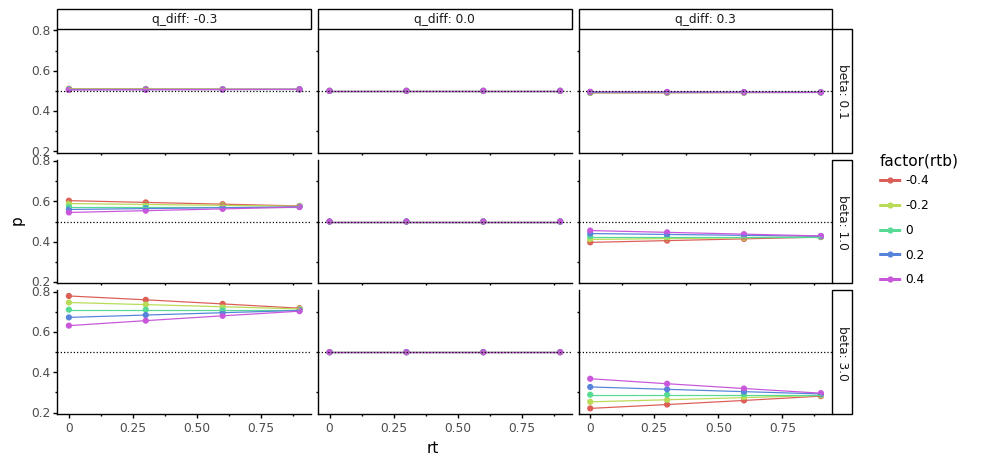

<ggplot: (145719710177)>

In [23]:
g = (gg.ggplot(rtb_dat, gg.aes('rt', 'p', color='factor(rtb)'))
     + gg.geom_point()
     + gg.geom_line()
     + gg.geom_hline(yintercept=0.5, linetype='dotted')
     + gg.facet_grid('beta ~ q_diff', labeller='label_both')
    )
g.save(os.path.join(plot_save_dir, '20_Understand_rtb.png'))
g

In [24]:
for plotted_model_name in np.unique(all_params_long.model)[1:]:

    print('Plotting {}.'.format(plotted_model_name))
    
    # Subset model data
    win_mod_sub = all_params_long.model == plotted_model_name
    not_nan_sub = np.invert(np.isnan(all_params_long.loc[win_mod_sub, 'param_value']))
    sub_dat = all_params_long[np.logical_and(win_mod_sub, not_nan_sub)]
    
    # Plot
    gg.options.figure_size = (5, 4)
    plot_session_params(sub_dat, plotted_model_name)
    plot_meta_params(sub_dat, plotted_model_name)
    plot_agegroup_params(sub_dat, plotted_model_name)
    plot_age_params(sub_dat, plotted_model_name)

Plotting Bbspr.
Saving to C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_Bbspr.png


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 8 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_Bbspr.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/11_ParamsMetaMale_Bbspr.png
  warn('Filename: {}'.format(fil

Plotting RLab.
Saving to C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLab.png


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 8 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLab.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/11_ParamsMetaMale_RLab.png
  warn('Filename: {}'.format(filen

Plotting RLabd.
Saving to C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabd.png


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 8 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabd.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/11_ParamsMetaMale_RLabd.png
  warn('Filename: {}'.format(fil

Plotting RLabh.
Saving to C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabh.png


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 8 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabh.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/11_ParamsMetaMale_RLabh.png
  warn('Filename: {}'.format(fil

Plotting RLabhj.
Saving to C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabhj.png


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 8 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabhj.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/11_ParamsMetaMale_RLabhj.png
  warn('Filename: {}'.format(f

Plotting RLabi.
Saving to C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabi.png


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 8 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabi.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/11_ParamsMetaMale_RLabi.png
  warn('Filename: {}'.format(fil

Plotting RLabj.
Saving to C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabj.png


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 8 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabj.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/11_ParamsMetaMale_RLabj.png
  warn('Filename: {}'.format(fil

Plotting RLabnp2.
Saving to C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabnp2.png


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 8 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabnp2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/11_ParamsMetaMale_RLabnp2.png
  warn('Filename: {}'.format

# Parameter correlations between models

In [25]:
BF_params = all_params[all_params.model == winning_model_names[0]]
RL_params = all_params[all_params.model == winning_model_names[1]]
RL_params

winning_params = RL_params.drop(columns=['model']).merge(
    BF_params.drop(columns=['model']), on=animal_colnames, suffixes=['_RL', '_BF'])
winning_params = winning_params.drop(columns=[
    'alpha_BF', 'calpha_BF', 'cnalpha_BF', 'nalpha_BF', 'p_reward_RL', 'p_switch_RL', 'bias_BF'])
winning_params

,age,agegroup,alpha_RL,animal,beta_RL,bias_RL,calpha_RL,cnalpha_RL,cnrta_RL,crta_RL,...,beta_BF,cnrta_BF,crta_BF,nrta_BF,p_noisy_BF,p_reward_BF,p_switch_BF,persev_BF,rta_BF,rtb_BF
0,40,Juvenile,0.346211,14,4.918598,0.0,0.0,0.0,-1.236668,-0.697039,...,4.363187,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
1,41,Juvenile,0.981353,14,2.287240,0.0,0.0,0.0,0.143249,-0.491254,...,2.307960,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
2,42,Juvenile,0.798917,14,2.664049,0.0,0.0,0.0,-0.131930,-0.602806,...,2.779561,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
3,43,Juvenile,0.678936,14,14.827989,0.0,0.0,0.0,-0.463474,-1.153053,...,13.570028,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
4,44,Juvenile,0.381010,14,14.932934,0.0,0.0,0.0,-1.210049,0.398456,...,6.695622,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,79,Adult,0.366579,13,6.183161,0.0,0.0,0.0,-1.127918,-0.300924,...,4.936704,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
379,80,Adult,0.963600,13,3.101257,0.0,0.0,0.0,0.273294,-0.439534,...,3.405244,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
380,81,Adult,0.563140,13,4.806681,0.0,0.0,0.0,-0.382581,0.177026,...,3.982055,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
381,82,Adult,0.972510,13,4.478380,0.0,0.0,0.0,0.276720,-0.093351,...,4.945253,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0


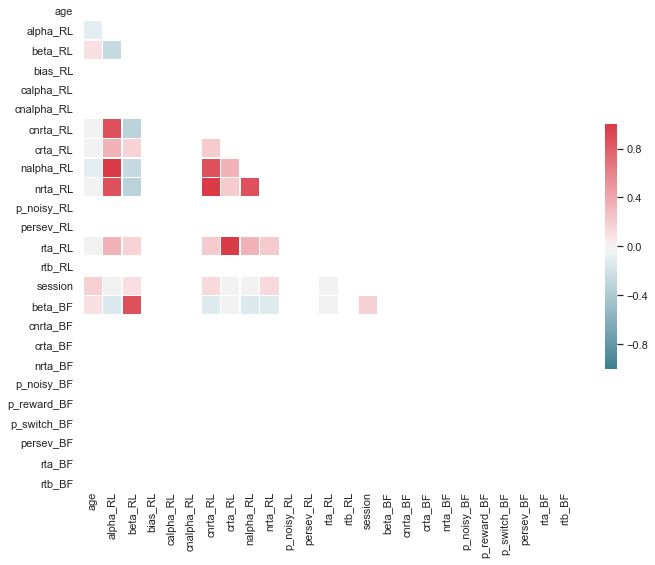

In [26]:
# Compute the correlation matrix
corr = winning_params.drop(columns=['animal', 'sID']).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig(os.path.join(plot_save_dir, '14_CorrelationMatrix.png'))

## Stats on parameter differences

In [27]:
import statsmodels.formula.api as smf

all_models = pd.DataFrame()

for param in ['alpha_RL', 'beta_RL', 'bias_RL', 'calpha_RL', 'cnalpha_RL', 'nalpha_RL', 'persev_RL',
              'beta_BF', 'p_reward_BF', 'p_switch_BF', 'persev_BF']:
    mod = smf.ols(
        formula='{} ~ (session + sex + agegroup) * (session + sex + agegroup)'.format(param),
        data=winning_params).fit()
    
    p = pd.DataFrame(mod.pvalues, columns=['p'])
    c = pd.DataFrame(mod.params, columns=['coef'])
    c['param'] = param

    mod_dat = p.merge(c, left_index=True, right_index=True)
    mod_dat
    
    all_models = all_models.append(mod_dat)

all_models['sig'] = ['sig' if p > 0.05 else 'ns' for p in all_models.p]
all_models = all_models.reset_index()
all_models = all_models.replace({
#     'sex[T.Male]': 'Sex', 'PreciseYrs': 'Age', 'PreciseYrs:sex[T.Male]': 'Interaction'
#     'sex[T.Male]': 'Sex', 'session:sex[T.Male]': 'Interaction'
    'sex[T.Male]': 'Sex', 'session': 'Session', 'agegroup[T.adult]': 'Agegroup',
    'sex[T.Male]:agegroup[T.adult]': 'Sex:Agegroup',
    'session:sex[T.Male]': 'Session:Sex',
    'session:agegroup[T.adult]': 'Session:Agegroup'
})
all_models = all_models.rename(columns={'index': 'effect'})
all_models.effect = pd.Categorical(all_models.effect, ordered=True,
#                                    categories=['Age', 'Sex', 'Interaction', 'Intercept']
#                                    categories=['session', 'Sex', 'Interaction', 'Intercept']
                                   categories=['Session', 'Agegroup', 'Sex',
                                               'Session:Agegroup', 'Session:Sex', 'Sex:Agegroup',
                                               'Intercept']
                                  )
all_models

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
g = (gg.ggplot(all_models, gg.aes('param', 'coef', fill='sig', color='sig'))#, color='param'))
     + gg.geom_bar(stat='identity')
     + gg.scale_fill_manual(values=['white', 'darkgrey'])
     + gg.scale_color_manual(values=['lightgrey', 'black'])
     + gg.theme_bw()
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
     + gg.labs(x='')
     + gg.facet_wrap('~ effect', scales='free')
)
g.save(os.path.join(plot_save_dir, '15_RegrModels.png'))
g.draw()

# OLD

# Plot all models

In [ ]:
g = (gg.ggplot(all_params_long, gg.aes('PreciseYrs', 'param_value', color='Gender'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.facet_grid('model~param_name')
 + gg.labs(x='Age')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsAge.png'))

In [ ]:
g = (gg.ggplot(all_params_long, gg.aes('session', 'param_value', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.coord_cartesian(xlim=(0, 12))
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsSession.png'))

In [ ]:
g = (gg.ggplot(all_params_long,
           gg.aes('age_group', 'param_value', fill='Gender'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
 + gg.theme_bw()
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsAgegroup.png'))

In [ ]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.facet_grid('~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsBiasSession.png'))

In [ ]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.stat_summary()
 + gg.theme_bw()
 + gg.facet_grid('age_group~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsBiasSession2.png'))

# Gen Rec

## WSLS

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLS_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLS_age_z_401_pymc3.csv')
beta_dat = gen[['beta', 'fullID']].merge(rec[['beta', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))

In [ ]:
(gg.ggplot(beta_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSS

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSS_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSS_age_z_401_pymc3.csv')
beta_dat = gen[['beta', 'fullID']].merge(rec[['beta', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))

In [ ]:
(gg.ggplot(beta_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSd

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSd_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSd_age_z_401_pymc3.csv')
param_dat = gen[['beta', 'bias', 'fullID']].merge(rec[['beta', 'bias', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))
param_dat

In [ ]:
(gg.ggplot(param_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

In [ ]:
(gg.ggplot(param_dat, gg.aes('bias_gen', 'bias_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSSd

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSSd_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSSd_age_z_401_pymc3.csv')
param_dat = gen[['beta', 'bias', 'fullID']].merge(rec[['beta', 'bias', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))
param_dat

In [ ]:
(gg.ggplot(param_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

In [ ]:
(gg.ggplot(param_dat, gg.aes('bias_gen', 'bias_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)